# Correlation Analysis

- https://blog.parsabg.com/stock-newseventssentiment-snes-1-0-a92c8748b2c3
- https://www.imf.org/en/Blogs/Articles/2022/01/11/crypto-prices-move-more-in-sync-with-stocks-posing-new-risks

## Bitcoin and S&P500

### 데이터수집 및 전처리

In [130]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 2, 10)
SP500 = web.DataReader(['sp500'], 'fred', start, end)
BTCUSD = pd.read_csv('../data/2012to2023BTC-USD_investing.csv')

,sp500
DATE,
2013-05-10,1633.70
2013-05-13,1633.77
2013-05-14,1650.34
2013-05-15,1658.78
2013-05-16,1650.47
...,...
2020-02-04,3297.59
2020-02-05,3334.69
2020-02-06,3345.78


In [135]:
print(SP500) # 형변환 후 인덱스를 DatetimeIndex로 변환해야 함
print(BTCUSD)

              sp500
DATE               
2013-05-10  1633.70
2013-05-13  1633.77
2013-05-14  1650.34
2013-05-15  1658.78
2013-05-16  1650.47
...             ...
2020-02-04  3297.59
2020-02-05  3334.69
2020-02-06  3345.78
2020-02-07  3327.71
2020-02-10  3352.09

[1762 rows x 1 columns]
              Date     Price      Open      High       Low    Vol. Change %
0     May 08, 2023  27,928.9  28,424.8  28,627.8  27,669.7  63.04K   -1.74%
1     May 07, 2023  28,424.8  28,857.1  29,122.0  28,419.6  36.50K   -1.50%
2     May 06, 2023  28,857.1  29,512.8  29,816.4  28,414.9  58.94K   -2.22%
3     May 05, 2023  29,513.2  28,842.2  29,653.9  28,825.3  74.52K    2.33%
4     May 04, 2023  28,842.1  29,023.6  29,352.7  28,687.4  53.80K   -0.63%
...            ...       ...       ...       ...       ...     ...      ...
4043  Apr 12, 2012       4.9       4.9       4.9       4.8  46.37K    0.00%
4044  Apr 11, 2012       4.9       4.8       5.0       4.8  67.04K    1.86%
4045  Apr 10, 2012       4.8   

In [136]:
BTCUSD['Price'] = BTCUSD['Price'].str.replace(',', '').astype(float)
BTCUSD['Date'] = pd.to_datetime(BTCUSD['Date'], format="%b %d, %Y")

In [138]:
print(BTCUSD.info())
print(BTCUSD)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4048 non-null   datetime64[ns]
 1   Price     4048 non-null   float64       
 2   Open      4048 non-null   object        
 3   High      4048 non-null   object        
 4   Low       4048 non-null   object        
 5   Vol.      4048 non-null   object        
 6   Change %  4048 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 221.5+ KB
None
           Date    Price      Open      High       Low    Vol. Change %
0    2023-05-08  27928.9  28,424.8  28,627.8  27,669.7  63.04K   -1.74%
1    2023-05-07  28424.8  28,857.1  29,122.0  28,419.6  36.50K   -1.50%
2    2023-05-06  28857.1  29,512.8  29,816.4  28,414.9  58.94K   -2.22%
3    2023-05-05  29513.2  28,842.2  29,653.9  28,825.3  74.52K    2.33%
4    2023-05-04  28842.1  29,023.6  29,352

In [139]:
BTC = BTCUSD[['Date', 'Price']]
BTC.set_index('Date', inplace=True) # 인덱스 변경
BTC.columns = ['BTC']
BTC

,BTC
Date,
2023-05-08,27928.9
2023-05-07,28424.8
2023-05-06,28857.1
2023-05-05,29513.2
2023-05-04,28842.1
...,...
2012-04-12,4.9
2012-04-11,4.9
2012-04-10,4.8


In [140]:
SP500BTC = BTC.merge(SP500, how='inner',right_index = True, left_index=True)
#Drop NA since we have nan values for weekends. S&P500 only trades business days
SP500BTC.dropna(inplace=True)
print(SP500BTC)

               BTC    sp500
2020-02-10  9854.1  3352.09
2020-02-07  9818.6  3327.71
2020-02-06  9772.0  3345.78
2020-02-05  9611.8  3334.69
2020-02-04  9193.9  3297.59
...            ...      ...
2013-05-16   118.2  1650.47
2013-05-15   114.2  1658.78
2013-05-14   111.4  1650.34
2013-05-13   118.0  1633.77
2013-05-10   117.7  1633.70

[1700 rows x 2 columns]


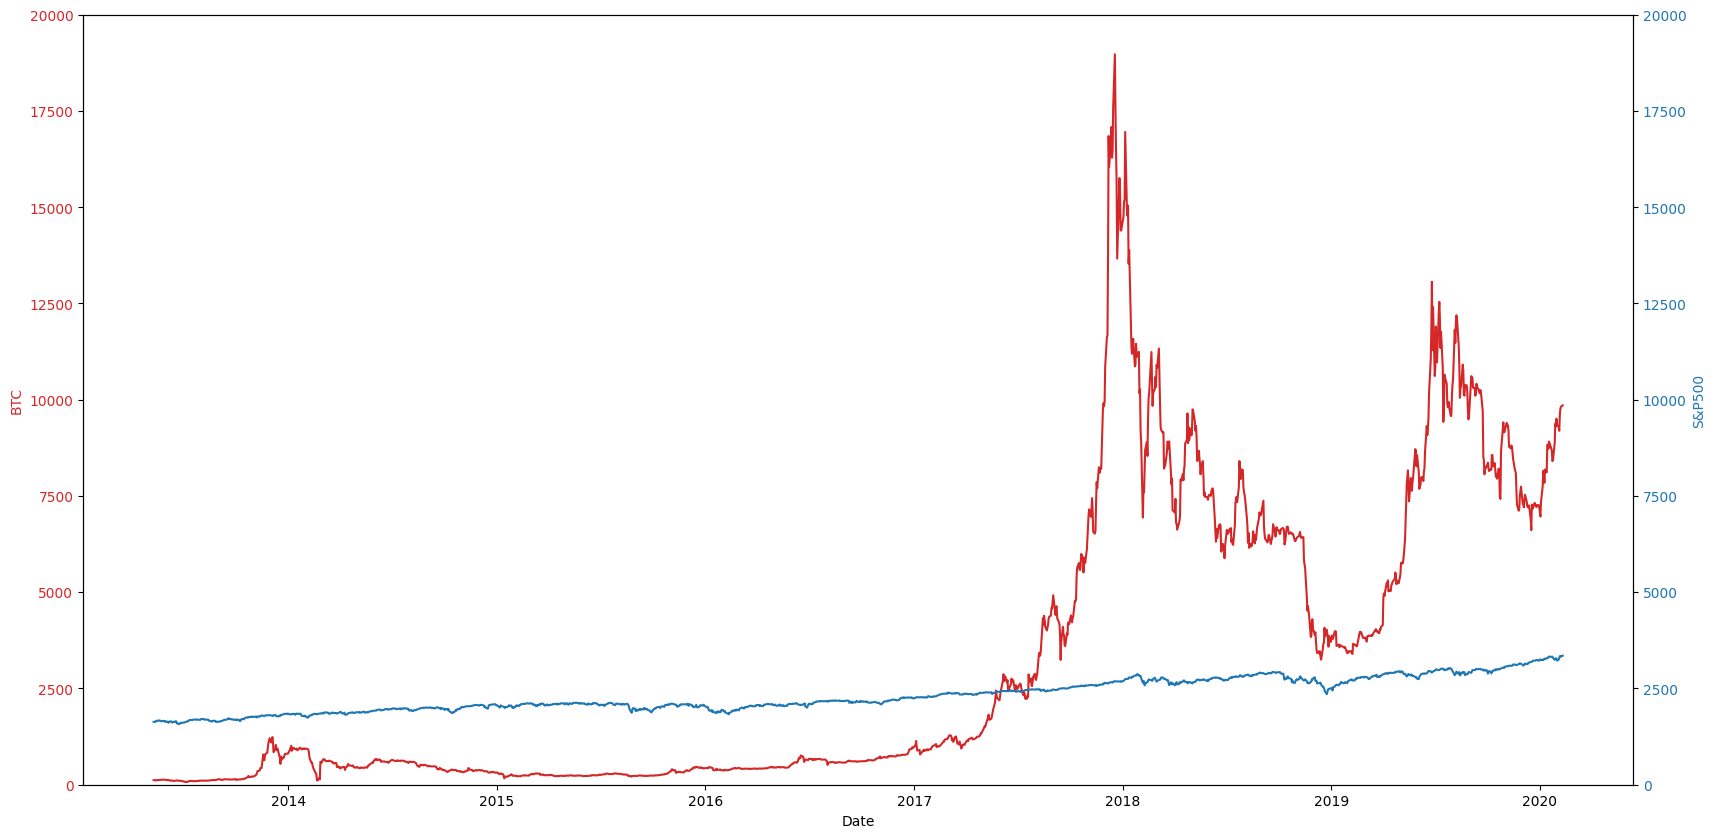

In [193]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(20, 10))

# 첫 번째 y 축 (왼쪽)
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('BTC', color=color)
ax1.plot(SP500BTC.index, SP500BTC['BTC'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0, 20000])

# 두 번째 y 축 (오른쪽)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('S&P500', color=color)
ax2.plot(SP500BTC.index, SP500BTC['sp500'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0, 20000])

plt.show()

### 상관관계 확인

In [141]:
correlation = SP500BTC.corr()
print(correlation)

            BTC     sp500
BTC    1.000000  0.843204
sp500  0.843204  1.000000


padas에서 기본으로 제공하는 `dataframe.corr()`를 사용해 열의 상관관계를 찾을 수 있다. 이는 -1과 1사이의 값을 반환하는데, 1에 가까울수록 양의 상관관계를 가진다는 의미(0: 관계없음, -1: 음의 상관관계).

위 결과로, BTC와 SP500은 약 0.84의 강한 양의 상관관계를 가지고 있는 것을 확인할 수 있다.

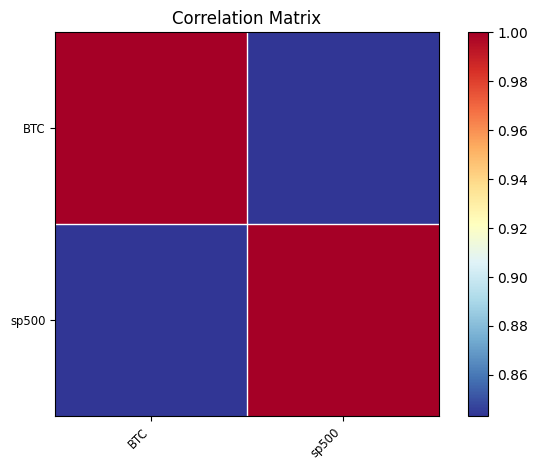

In [153]:
from statsmodels import api as sm
import matplotlib.pyplot as plt
sm.graphics.plot_corr(correlation,xnames=list(correlation.columns))
plt.show()

> 위 시각화에서 출력된 상관계수의 범위를 0(상관없음)부터 1(양의 상관관계)까지 확장해보면, BTC와 SP500이 얼마나 유의미한 상관관계를 가지는지 좀 더 직관적으로 알 수 있다.

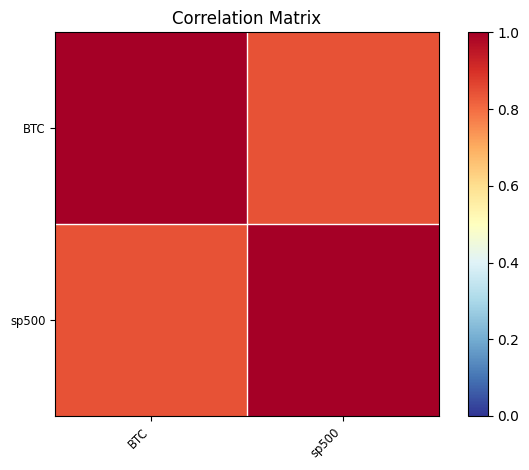

In [158]:
from statsmodels import api as sm
import matplotlib.pyplot as plt

fig = sm.graphics.plot_corr(correlation, xnames=list(correlation.columns))
ax = fig.get_axes()[0]  # 첫 번째 Axes 객체를 가져옴
image = ax.images[0]  # Axes 객체 내에 있는 AxesImage 객체를 가져옴
image.set_clim(0, 1)  # color limit 설정

plt.show()

### 통계적으로 유의미한가?

linergress를 사용하면 slope, intercept, r-val, p-val 등을 확인할 수 있다.
아래 통계 검증 결과는 위 비트코인과 SP500이 유의미한 양의 상관관계를 가지고 있다는 결

In [144]:
from scipy.stats import linregress
linregress(SP500BTC['sp500'],SP500BTC['BTC'])

LinregressResult(slope=7.46667225019351, intercept=-14137.664384891012, rvalue=0.8432036186281641, pvalue=0.0, stderr=0.11552619212646043, intercept_stderr=272.1575552464003)

## Bitcoin and SNES(Stock-NewsEventsSentiment)

> _SNES 데이터는 `.parquet`으로 되어있다._
- https://www.kaggle.com/datasets/parsabg/stocknewseventssentiment-snes-10?resource=download&select=data.parquet
- 위 dataset의 `'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'`은 S&P500.

In [161]:
PARQUET_FILEPATH = '../data/data.parquet'
snes_df = pd.read_parquet(PARQUET_FILEPATH)
snes_df

,Open,High,Low,Close,Adj Close,Volume,Symbol,Security,GICS Sector,GICS Sub-Industry,...,News - Analyst Comments,News - Stocks,News - Dividends,News - Corporate Earnings,News - Mergers & Acquisitions,News - Store Openings,News - Product Recalls,News - Adverse Events,News - Personnel Changes,News - Stock Rumors
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-30,160.929993,163.100006,158.610001,160.179993,150.921692,3056900.0,MMM,3M,Industrials,Industrial Conglomerates,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-01,160.669998,161.899994,157.720001,158.789993,149.612045,1989100.0,MMM,3M,Industrials,Industrial Conglomerates,...,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-10-02,156.470001,161.940002,156.250000,160.360001,151.091309,1768600.0,MMM,3M,Industrials,Industrial Conglomerates,...,2.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0
2020-10-05,162.250000,163.500000,161.759995,162.750000,153.343170,1457000.0,MMM,3M,Industrials,Industrial Conglomerates,...,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
2020-10-06,163.440002,165.699997,161.830002,162.229996,152.853195,2021900.0,MMM,3M,Industrials,Industrial Conglomerates,...,3.0,3.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-24,172.000000,174.679993,171.389999,174.610001,174.610001,3255000.0,ZTS,Zoetis,Health Care,Pharmaceuticals,...,7.0,7.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0
2022-06-27,173.839996,175.210007,172.929993,173.600006,173.600006,1378400.0,ZTS,Zoetis,Health Care,Pharmaceuticals,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-06-28,172.960007,174.669998,170.009995,170.119995,170.119995,1725800.0,ZTS,Zoetis,Health Care,Pharmaceuticals,...,7.0,7.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0


In [163]:
snes_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Symbol',
       'Security', 'GICS Sector', 'GICS Sub-Industry',
       'News - All News Volume', 'News - Volume', 'News - Positive Sentiment',
       'News - Negative Sentiment', 'News - New Products', 'News - Layoffs',
       'News - Analyst Comments', 'News - Stocks', 'News - Dividends',
       'News - Corporate Earnings', 'News - Mergers & Acquisitions',
       'News - Store Openings', 'News - Product Recalls',
       'News - Adverse Events', 'News - Personnel Changes',
       'News - Stock Rumors'],
      dtype='object')

- `'News - All News Volume'`
- `'News - Volume'`
- `'News - Positive Sentiment'`
- `'News - Negative Sentiment'`
- `'News - New Products'`
- `'News - Layoffs'`
- `'News - Analyst Comments'`
- `'News - Stocks'`
- `'News - Dividends'`
- `'News - Corporate Earnings'`
- `'News - Mergers & Acquisitions'`
- `'News - Store Openings'`
- `'News - Product Recalls'`
- `'News - Adverse Events'`
- `'News - Personal Change'`
- `'News - Stock Rumors'`

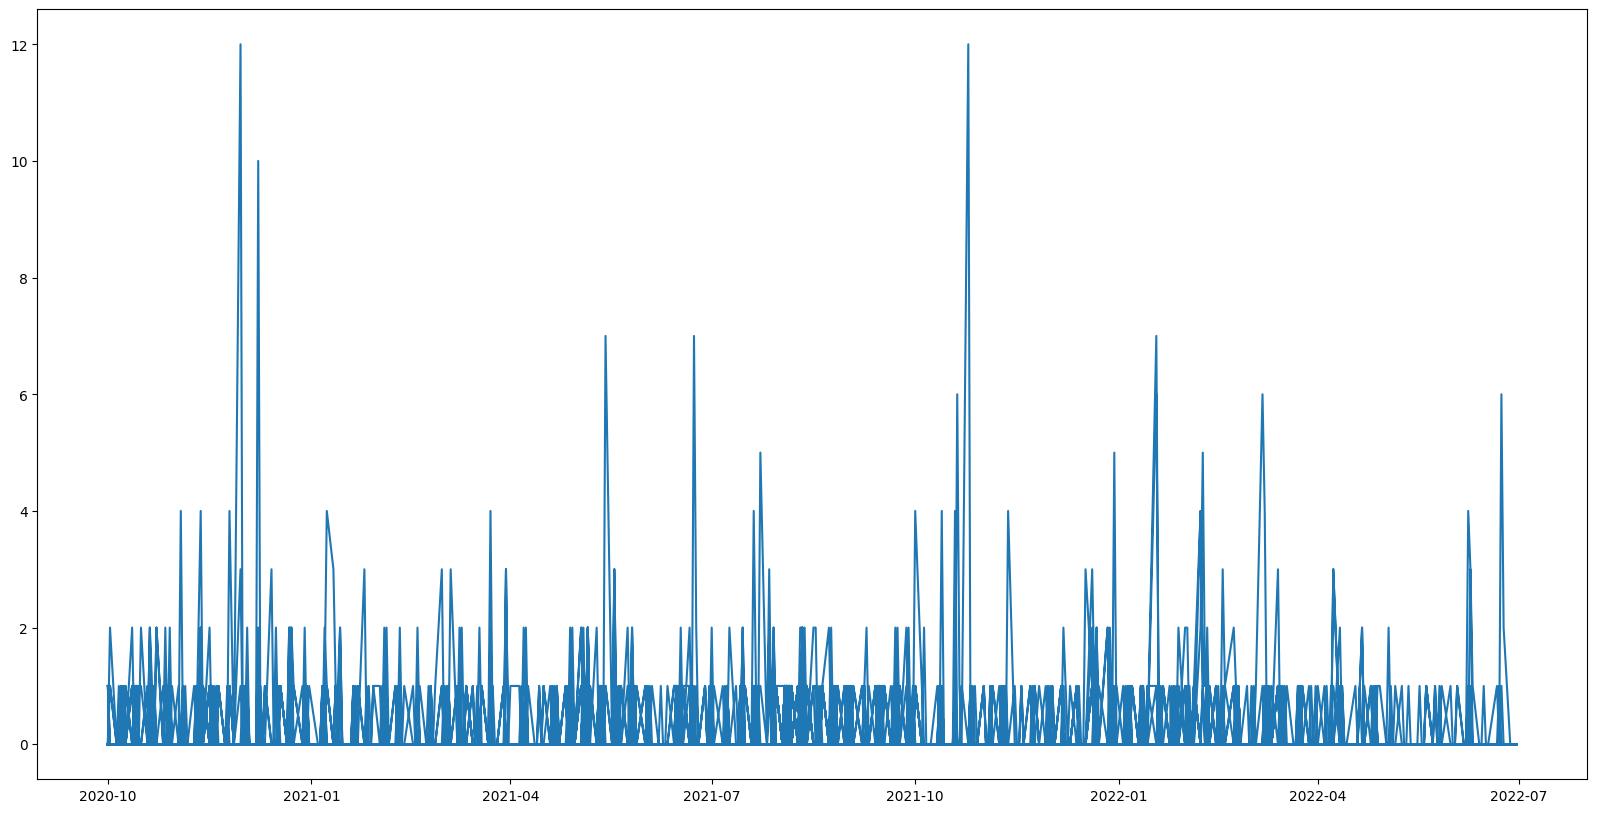

In [201]:
plt.figure(figsize=(20,10))
plt.plot(snes_df.index, snes_df['News - Stock Rumors'])
plt.show()

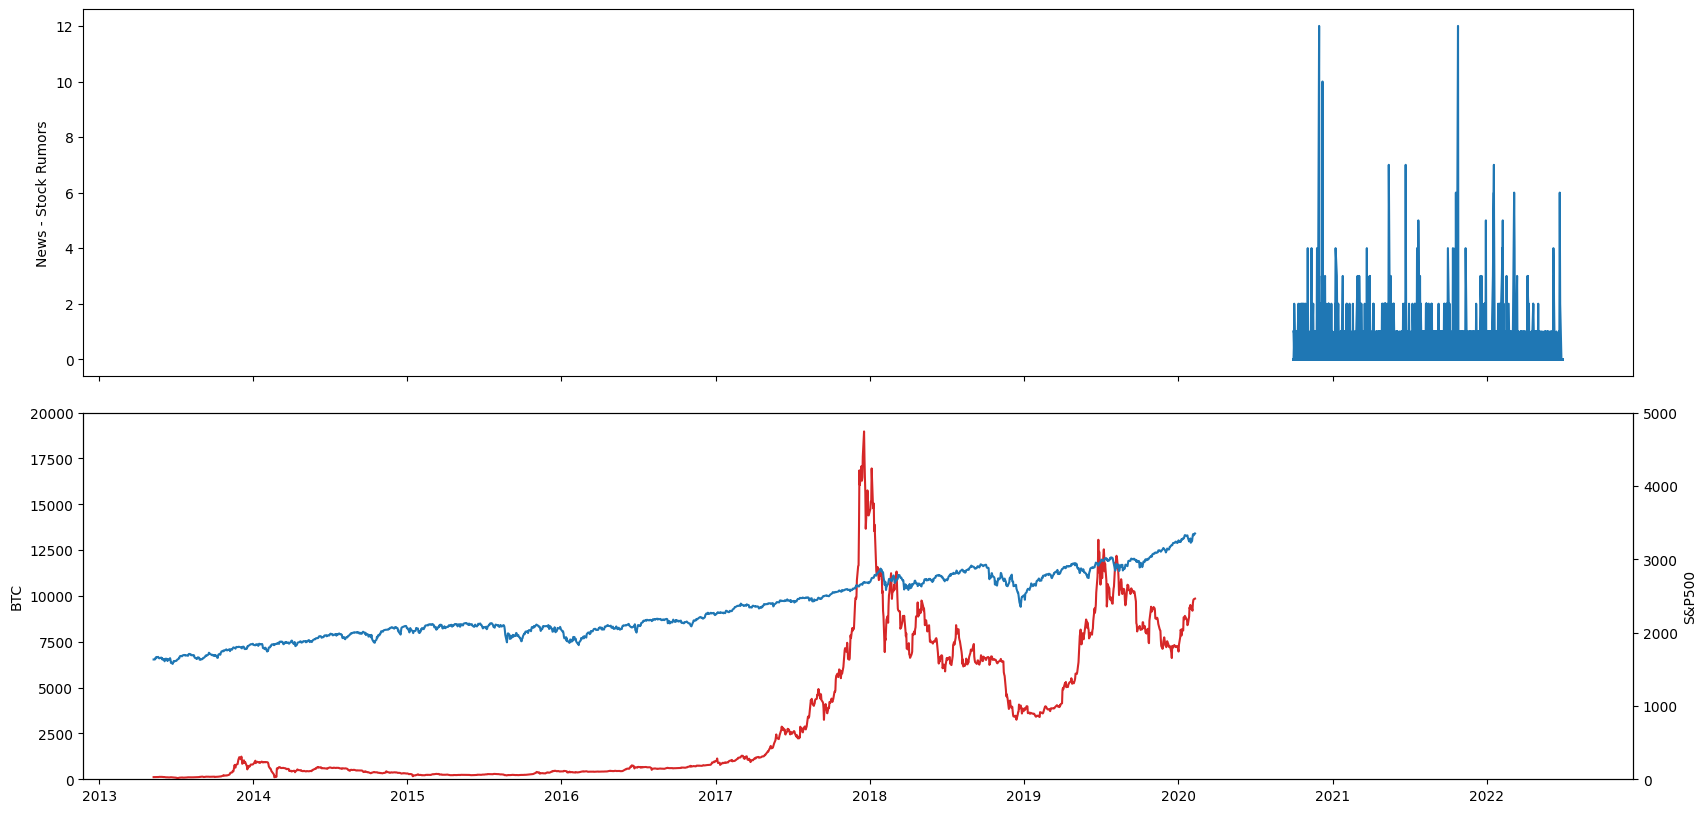

In [202]:
#//FIXME: 아래 코드를 올바르게 표시하려면 SNES에 있는 index(datetime)에 맞는 btc plot을 그려야 한다. snes에서 sp500을 다시 구할 수 있다.
import matplotlib.pyplot as plt

# subplot 생성
figg, (axx1, axx2) = plt.subplots(2, 1, figsize=(20, 10), sharex=True)

# 첫 번째 subplot (위쪽)
axx1.plot(snes_df.index, snes_df['News - Stock Rumors'])
axx1.set_ylabel('News - Stock Rumors')

# 두 번째 subplot (아래쪽)
axx2.plot(SP500BTC.index, SP500BTC['BTC'], color='tab:red')
axx2.set_ylabel('BTC')

# 두 번째 subplot의 y축 범위 설정
axx2.set_ylim([0, 20000])

# 두 번째 subplot의 두 번째 y 축 (오른쪽)
axx3 = axx2.twinx()
axx3.plot(SP500BTC.index, SP500BTC['sp500'], color='tab:blue')
axx3.set_ylabel('S&P500')

# 두 번째 subplot의 두 번째 y 축의 y축 범위 설정
axx3.set_ylim([0, 5000])

# subplot 간의 간격 설정
plt.subplots_adjust(hspace=0.1)

plt.show()